In [1]:
from system import TradingEnv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set('paper')

/home/aaruran/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
%matplotlib inline

In [3]:
amzn_env = TradingEnv('AMZN')

In [4]:
amzn_env.data

,x,diff_x,std,sharpe,q
Date,,,,,
2013-11-22,-0.080273,-0.011563,NaN,0.000000,0.000000
2013-11-25,-0.068710,-0.012480,NaN,0.000000,0.345414
2013-11-26,-0.056230,-0.013905,NaN,0.000000,0.989422
2013-11-27,-0.042325,-0.017711,NaN,0.000000,1.908694
2013-11-29,-0.024614,0.003359,NaN,0.000000,3.158395
...,...,...,...,...,...
2017-12-28,1.078426,0.014120,0.005686,0.282925,14.619528
2017-12-29,1.064306,-0.016570,0.005434,-0.140517,13.016043
2018-01-02,1.080876,-0.012694,0.006777,-0.339309,13.170170


In [6]:
df= amzn_env.data
df['prices'] = amzn_env.prices
df.head()

,x,diff_x,std,sharpe,q,prices
Date,,,,,,
2013-11-22,-0.080273,-0.011563,NaN,0.0,0.000000,372.309998
2013-11-25,-0.068710,-0.012480,NaN,0.0,0.345414,376.640015
2013-11-26,-0.056230,-0.013905,NaN,0.0,0.989422,381.369995
2013-11-27,-0.042325,-0.017711,NaN,0.0,1.908694,386.709991
2013-11-29,-0.024614,0.003359,NaN,0.0,3.158395,393.619995


x            AxesSubplot(0.125,0.125;0.110714x0.755)
diff_x    AxesSubplot(0.257857,0.125;0.110714x0.755)
std       AxesSubplot(0.390714,0.125;0.110714x0.755)
sharpe    AxesSubplot(0.523571,0.125;0.110714x0.755)
q         AxesSubplot(0.656429,0.125;0.110714x0.755)
prices    AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

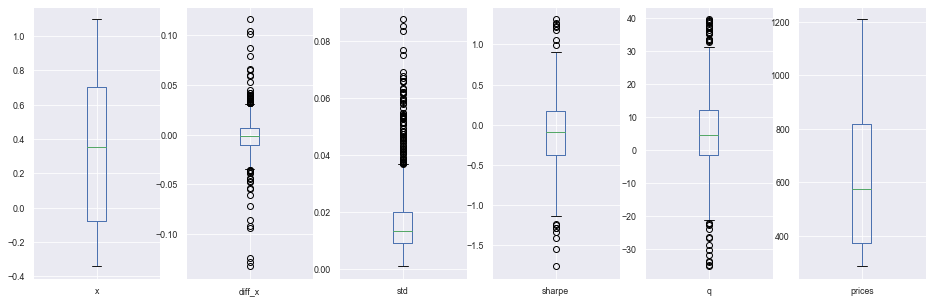

In [17]:
df.plot(kind='box', subplots=True, figsize=(16, 5))

[]

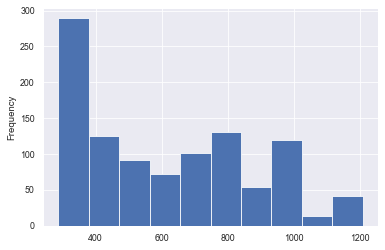

In [19]:
df['prices'].plot(kind='hist')
plt.plot()

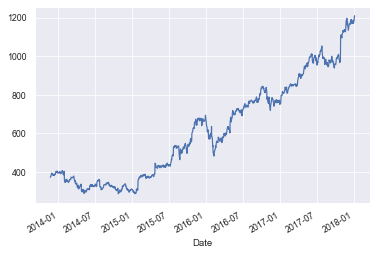

In [10]:
df['prices'].plot()
plt.show()

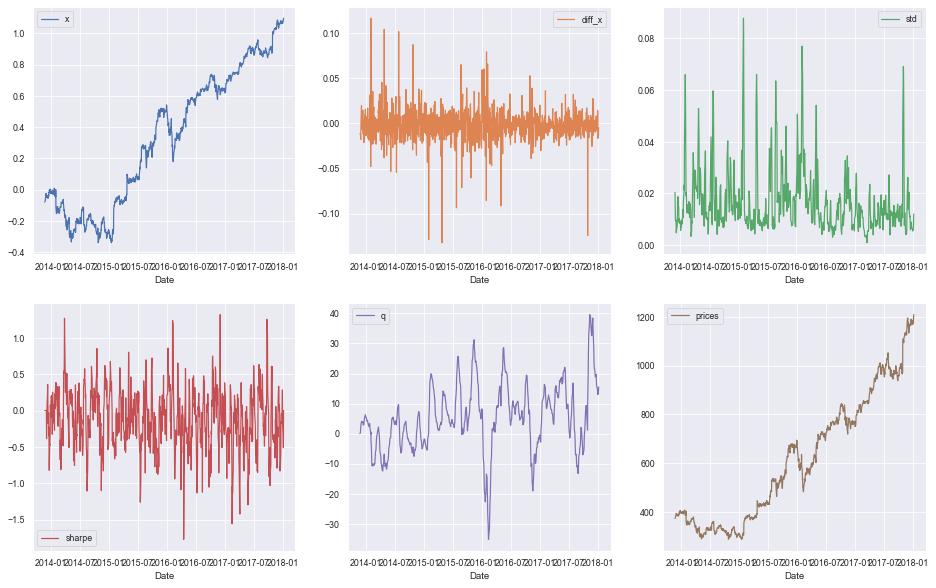

In [31]:
df.plot(subplots=True, layout=(2,3), figsize=(16,10), kind='line', sharex=False, sharey=False)
plt.show()

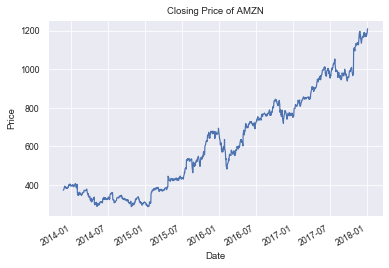

In [33]:
amzn_env.prices.plot()
plt.ylabel('Price')
plt.title('Closing Price of AMZN')
plt.savefig('plots/nonstationary-prices-amazon.png')
plt.show()

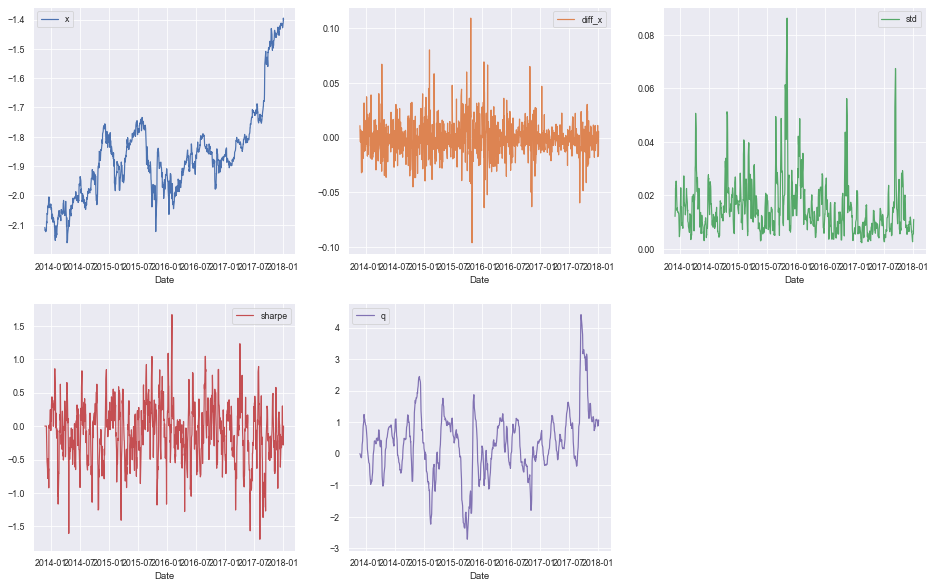

In [37]:
abbv_env = TradingEnv('ABBV')
abbv_env.data.plot(subplots=True, layout=(2,3), figsize=(16,10), kind='line', sharex=False, sharey=False)
plt.show()